# Intro
When using parametric statistical models such as linear regression, we assume the data follows Gaussian distribution. If data does not follow normal distribution, we either should use non-parametric models such as tree-based models, or transform the data into normal distribution.  

In this notebook, we will test different data transformation methods on the [house price dataset from Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).  


First, we will pick a few features to try transformation among 37 numerical variables.  
Second, apply 6 different transformation methods to see if it improves the normality. Such transformation methods include,  
1. log: `np.log(df)`
2. reciprocal: `1/df`
3. sqrt: `df**0.5`
4. power: `df**2`
5. boxcox: `stats.boxcox(df)`
6. yeojohnson: `stats.yeojohnson(df)`


To test the normality, we check 3 things:  
1. [Skewness](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html): `s = stats.skew(data)`  
2. [Kurtosistest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest): `k, p = stats.kurtosistest(data)`  
3. [normality test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html): `n, p = stats.normaltest(data)`   
4. P-value of the normality test.  

**Skewness test**: Measures how skewed our data is. Positive skewness means the distribution has long tail on the right side. Higher the skewness, more skewed the data is. 

Skewness = 
$
E[(\frac{X-\mu}{\sigma})^3]
$  

**Kurtosis test**: Test whether a dataset has normal kurtosis. It tests the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution.  

kurtosis = $3(n-1)/(n+1)$.

**Normality test**: Test whether a sample differs from a normal distribution.
This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [1], [2] test that combines skew and kurtosis to produce an omnibus test of normality.  

normality = $s^2 + k^2$, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.


References: 
- [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- [Comprehensive data exploration with Python (Kaggle Notebook)](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook)
- [Detailed Examination for House Price (Top%10)
](https://www.kaggle.com/darkside92/detailed-examination-for-house-price-top-10/notebook)

[Picture source](https://www.statisticssolutions.com/transforming-data-for-normality/)
![title](images/distribution_transformation.png)

# Import packages and data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

sns.set() # use seaborn as the default graphing tool

In [2]:
df_train = pd.read_csv('../house_price/data/train.csv', index_col=0)
df_test = pd.read_csv('../house_price/data/test.csv', index_col=0)

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Select data to examine

## Check out numerical features 

In [6]:
numerica_data = df_train._get_numeric_data()
numerica_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
numeric_cols = numerica_data.columns
print("number of numeric columns:", len(numeric_cols))
print("numeric columns:", numeric_cols)

number of numeric columns: 37
numeric columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


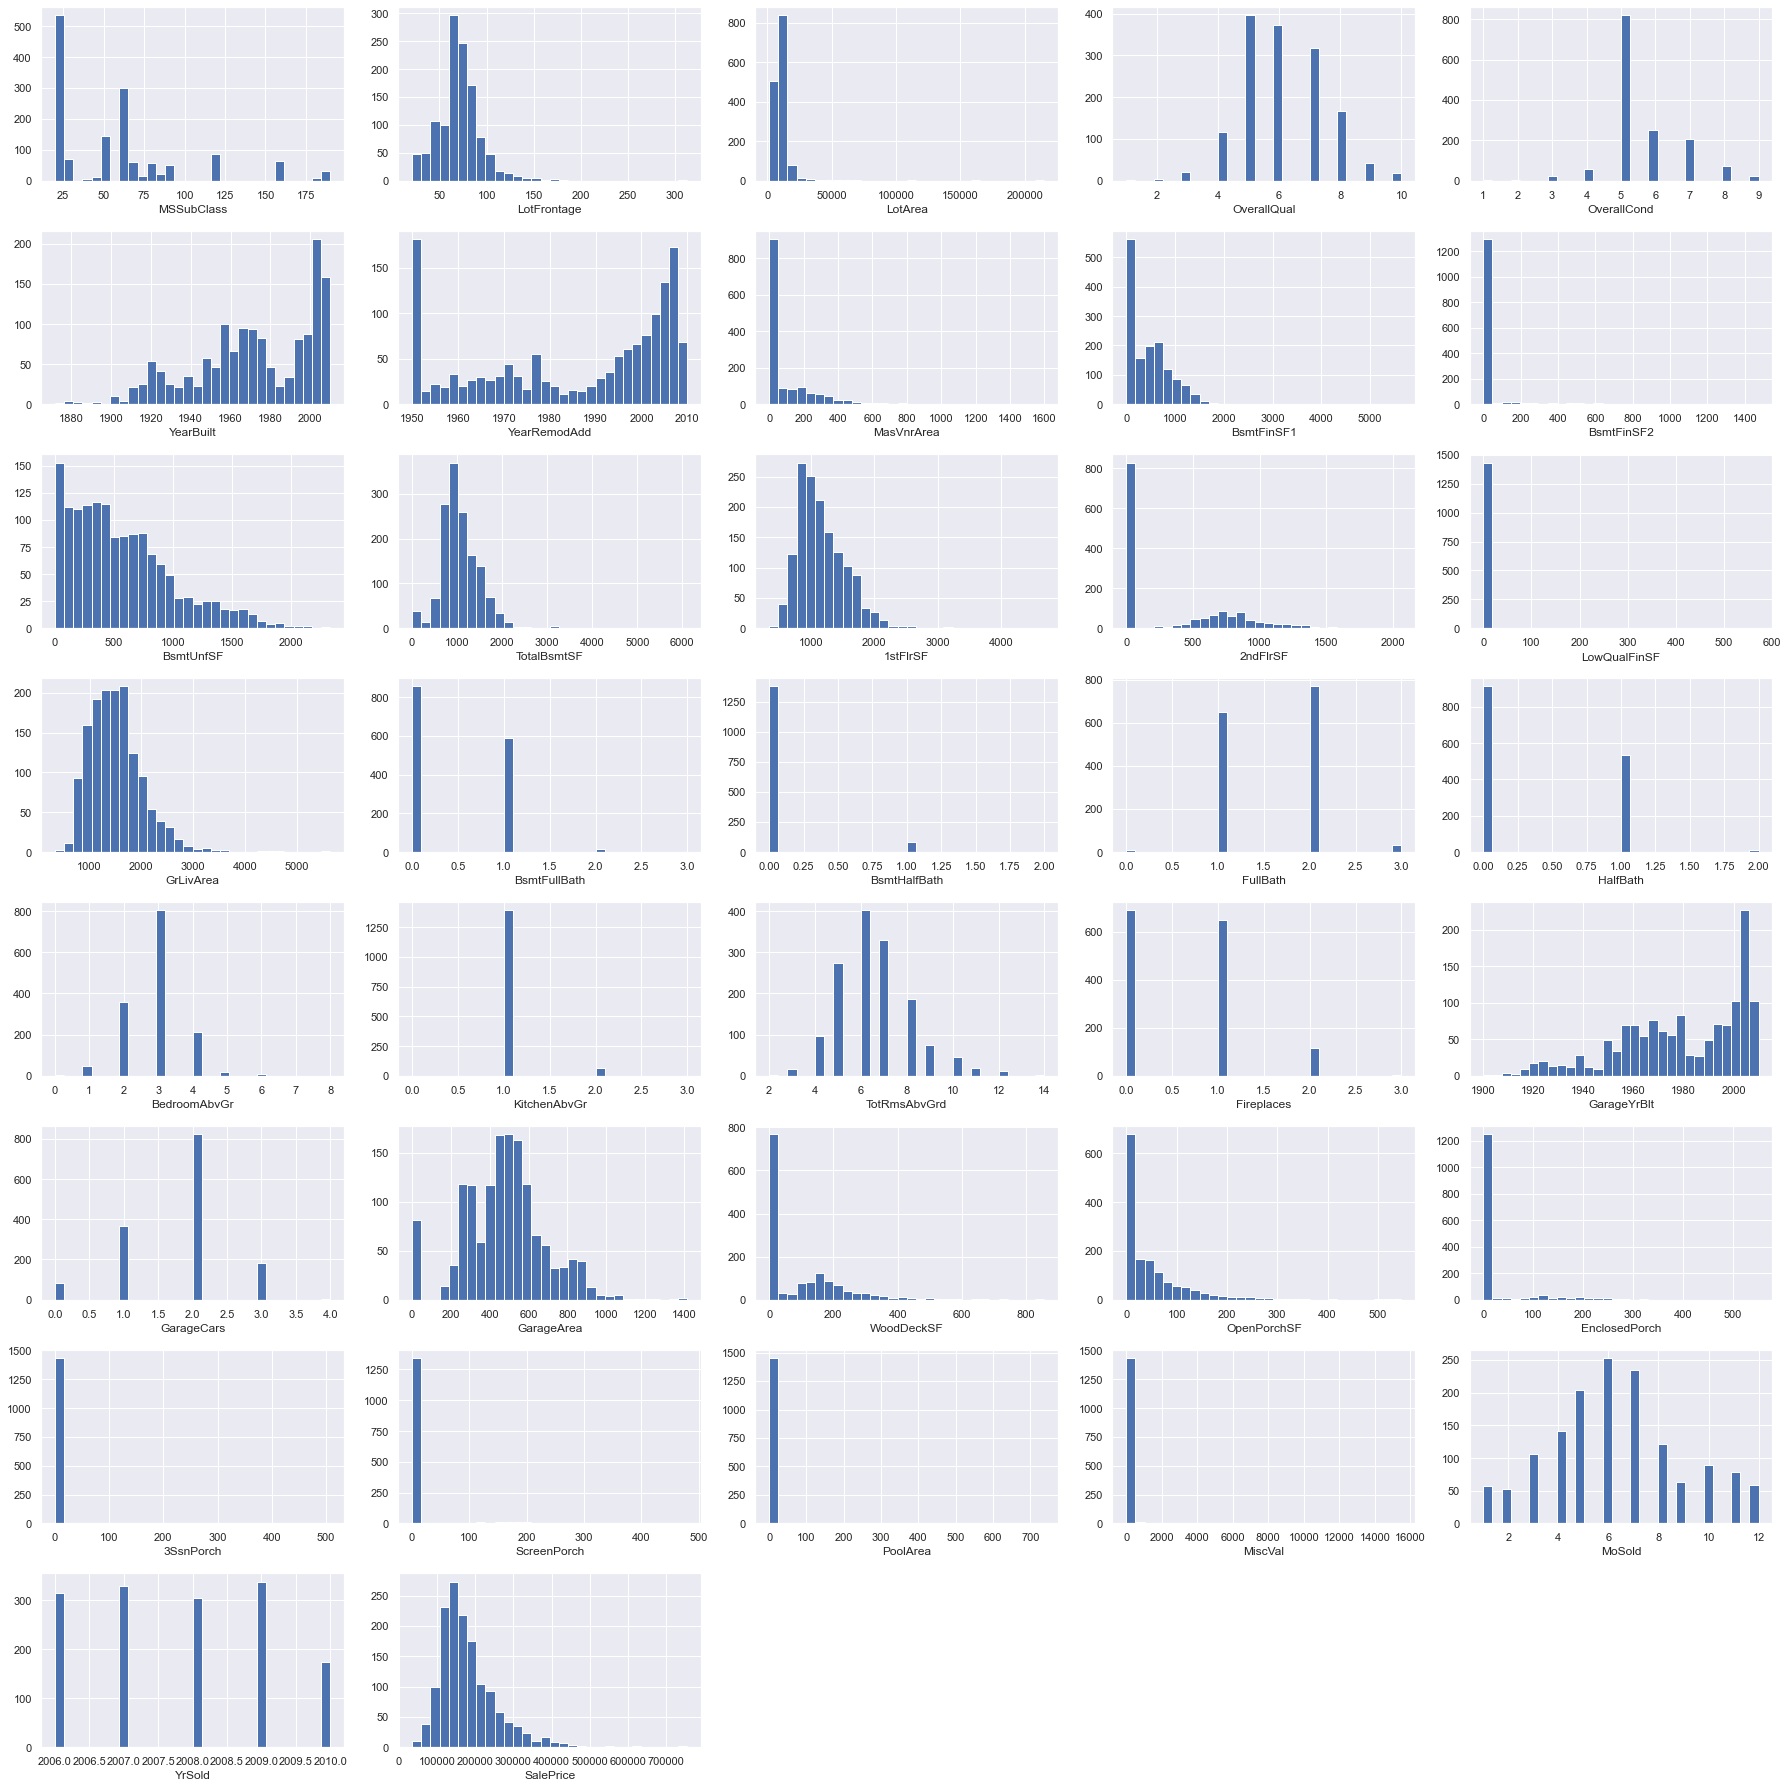

In [8]:
plt.figure(figsize=(25, 25))
for i in range(len(numeric_cols)):
    feature = numeric_cols[i]
    plt.subplot(8, 5, i+1)
    df_train[feature].hist(bins=30)
    plt.xlabel(feature)
plt.tight_layout()

## Pick features to transform

In [9]:
cols = ['SalePrice', 'GrLivArea', 'BsmtUnfSF', 'YearBuilt']

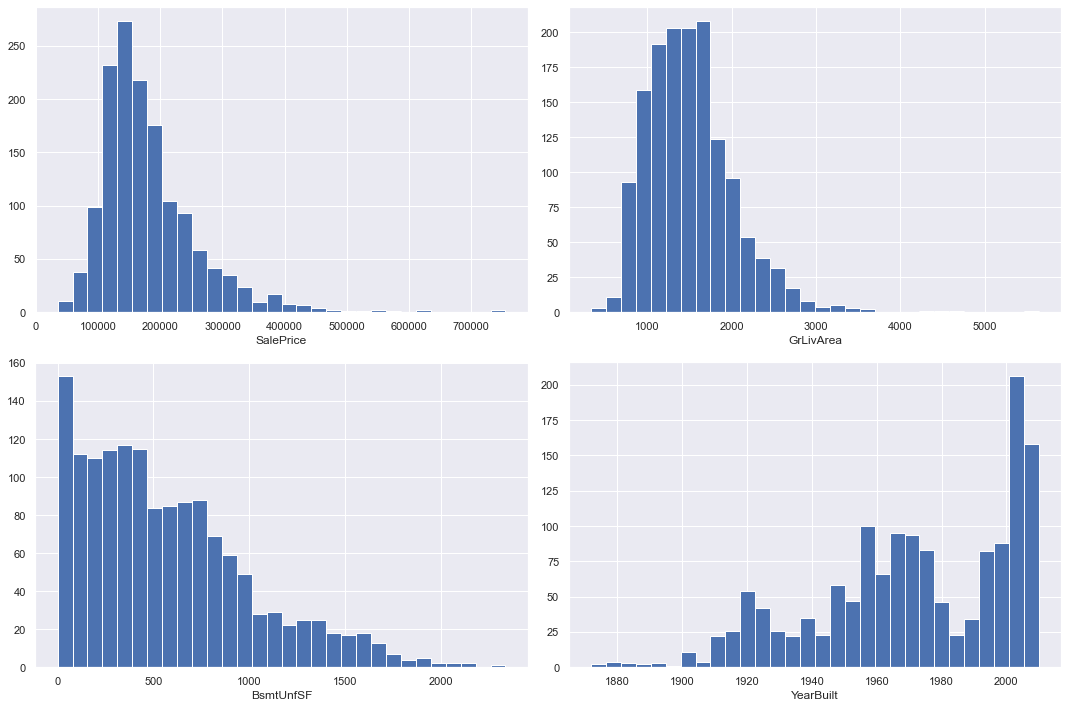

In [10]:
plt.figure(figsize=(15, 10))
for i in range(len(cols)):
    feature = cols[i]
    plt.subplot(2, 2, i+1)
    df_train[feature].hist(bins=30)
    plt.xlabel(feature)
plt.tight_layout()

# Transform data

In [11]:
from sklearn.preprocessing import PowerTransformer
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


In [12]:
def hist_prob_plot(data, label, feature):
    plt.subplots(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data)
    plt.xlabel(label)
    plt.title(feature)

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist='norm', plot=plt)
    plt.title(feature)
    plt.tight_layout()
    plt.show()
    
def get_normality_df(data, method, alpha=0.05):
    s = stats.skew(data)
    k, p = stats.kurtosistest(data)
    n, p = stats.normaltest(data)
    t = p > alpha

    normality_dict = {'skew': s, 
                     'kurtosis': k,
                     'normality': n,
                     'normality_p': p,
                     'is_normal': t}
    
    df = pd.DataFrame(normality_dict, index=[method])
    return df
    
def test_transformation(df, feature):
    normality_df = pd.DataFrame()

    data = df
    hist_prob_plot(df, 'Origianl', feature)
    normality_df_temp = get_normality_df(df, 'original')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    data = np.log(df)
    hist_prob_plot(data, 'log', feature)
    normality_df_temp = get_normality_df(data, 'log')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    data = 1/df
    hist_prob_plot(data, 'reciprocal', feature)
    normality_df_temp = get_normality_df(data, 'reciprocal')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    data = df**0.5
    hist_prob_plot(data, 'sqrt', feature)
    normality_df_temp = get_normality_df(data, 'sqrt')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    data = df**2
    hist_prob_plot(data, 'power', feature)
    normality_df_temp = get_normality_df(data, 'power')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    data = stats.boxcox(df)[0]
    hist_prob_plot(data, 'boxcox', feature)
    normality_df_temp = get_normality_df(data, 'boxcox')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    data = stats.yeojohnson(df)[0]
    hist_prob_plot(data, 'yeojohnson', feature)
    normality_df_temp = get_normality_df(data, 'yeojohnson')
    normality_df = normality_df.append(normality_df_temp)
    print(normality_df_temp)

    return normality_df

### GrLivArea

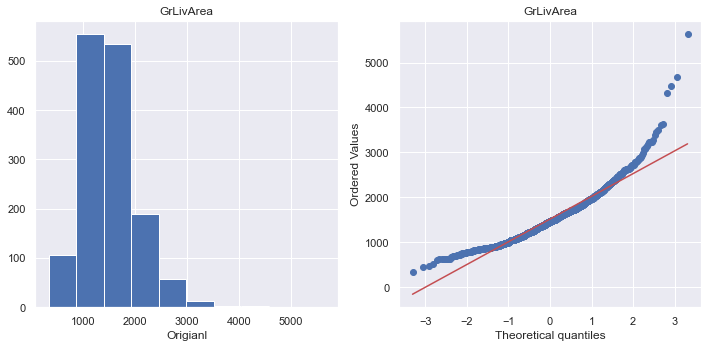

              skew   kurtosis   normality   normality_p  is_normal
original  1.365156  12.825977  437.120257  1.203767e-95      False


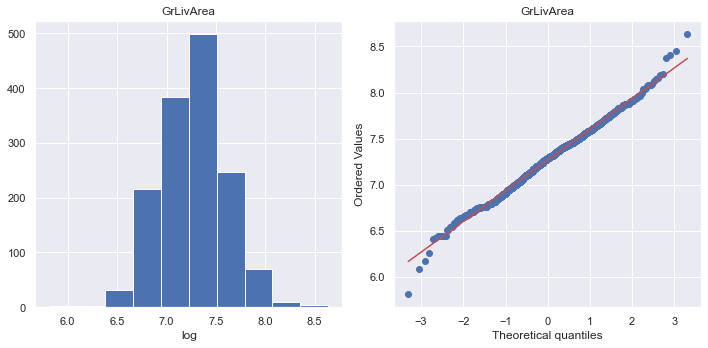

         skew  kurtosis  normality  normality_p  is_normal
log -0.006988  2.017774   4.083414     0.129807       True


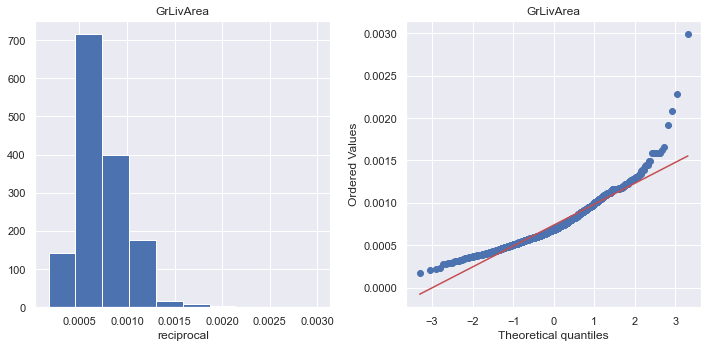

                skew   kurtosis   normality    normality_p  is_normal
reciprocal  1.376544  13.440829  456.313062  8.182339e-100      False


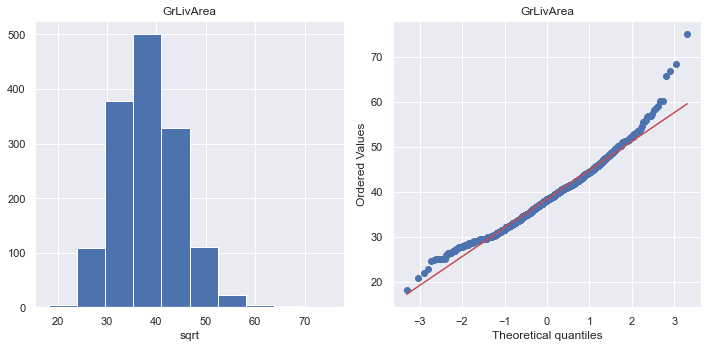

          skew  kurtosis   normality   normality_p  is_normal
sqrt  0.593644  6.233928  113.605305  2.142503e-25      False


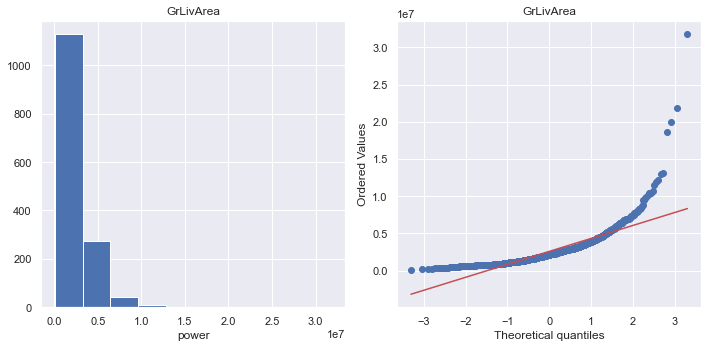

           skew   kurtosis  normality    normality_p  is_normal
power  4.345178  21.830418  1408.1894  1.642696e-306      False


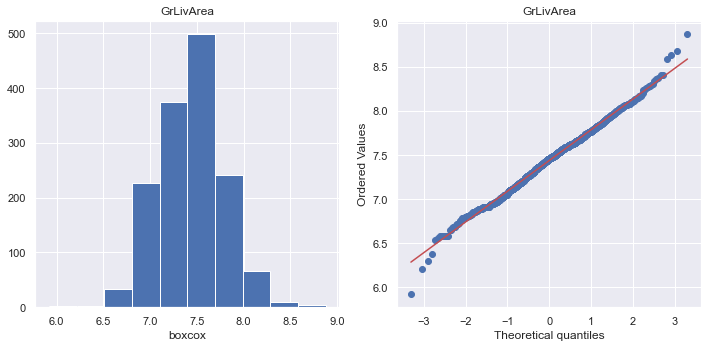

            skew  kurtosis  normality  normality_p  is_normal
boxcox  0.000195  2.022495   4.090497     0.129348       True


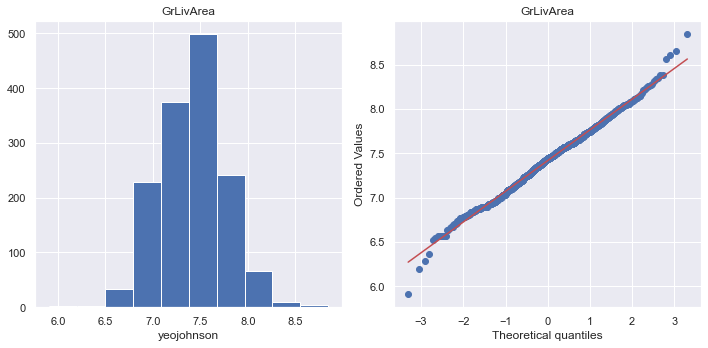

                skew  kurtosis  normality  normality_p  is_normal
yeojohnson  0.000171  2.018289   4.073496     0.130452       True


In [13]:
feature = 'GrLivArea'
df = df_train[feature]
normality_df_grlivarea = test_transformation(df, 'GrLivArea')

In [14]:
normality_df_grlivarea

,skew,kurtosis,normality,normality_p,is_normal
original,1.365156,12.825977,437.120257,1.203767e-95,False
log,-0.006988,2.017774,4.083414,1.298069e-01,True
reciprocal,1.376544,13.440829,456.313062,8.182339e-100,False
sqrt,0.593644,6.233928,113.605305,2.142503e-25,False
power,4.345178,21.830418,1408.189400,1.642696e-306,False
boxcox,0.000195,2.022495,4.090497,1.293480e-01,True
yeojohnson,0.000171,2.018289,4.073496,1.304523e-01,True


### BsmtUnfSF

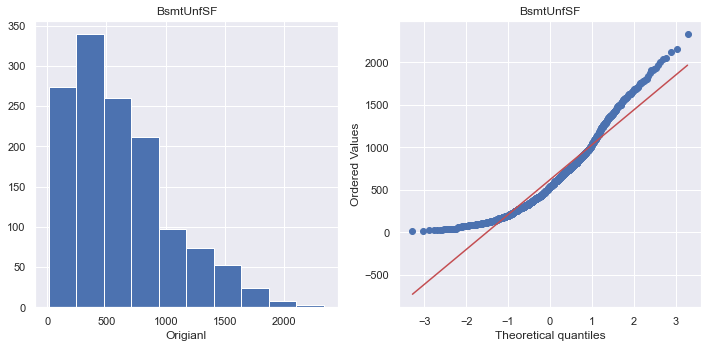

              skew  kurtosis   normality   normality_p  is_normal
original  0.969592  3.385133  165.239527  1.314294e-36      False


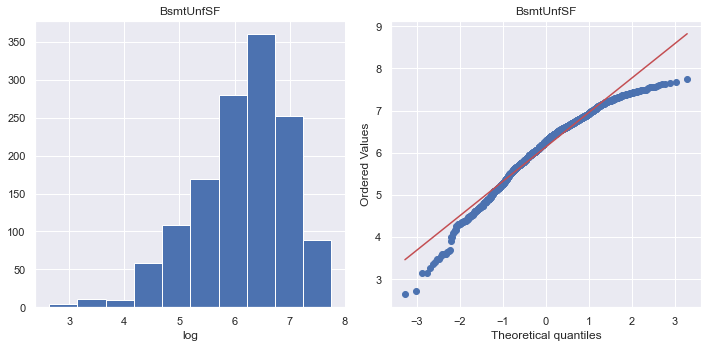

         skew  kurtosis   normality   normality_p  is_normal
log -0.765891  3.515835  118.264266  2.085648e-26      False


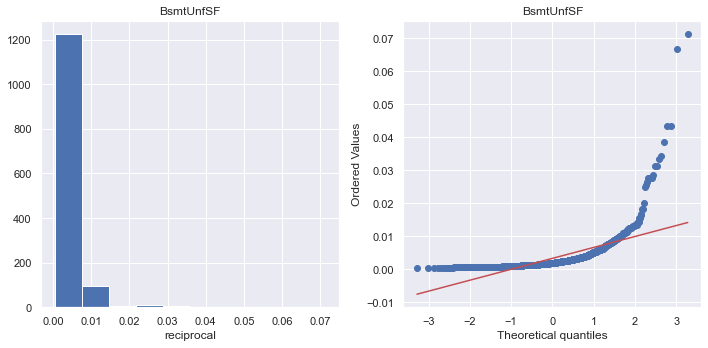

                skew   kurtosis    normality  normality_p  is_normal
reciprocal  6.590023  22.414039  1684.536174          0.0      False


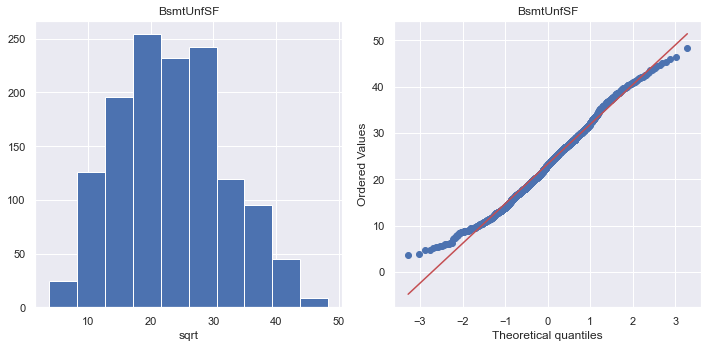

          skew  kurtosis  normality   normality_p  is_normal
sqrt  0.219466 -5.235449  38.053473  5.454983e-09      False


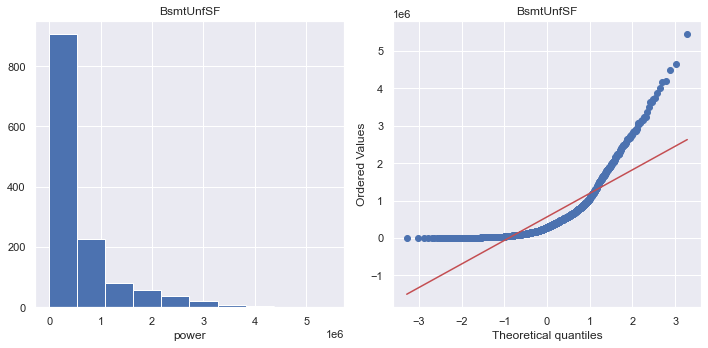

           skew   kurtosis   normality    normality_p  is_normal
power  2.291131  13.456269  649.148786  1.094289e-141      False


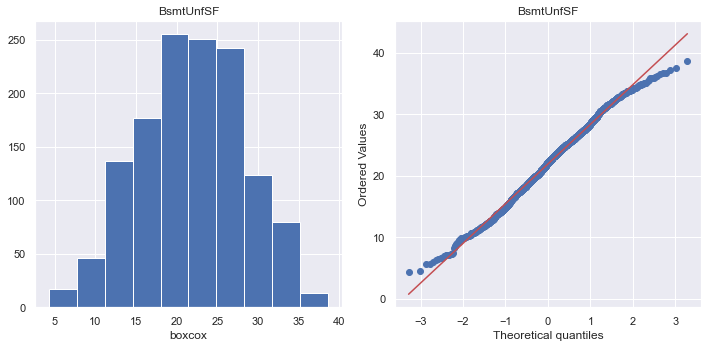

            skew  kurtosis  normality   normality_p  is_normal
boxcox -0.051563 -5.262049  28.289627  7.194252e-07      False


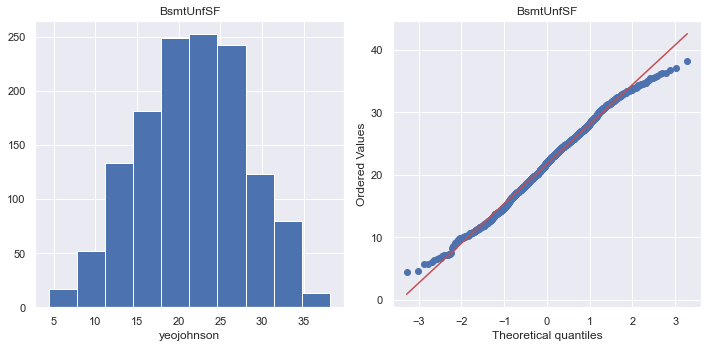

                skew  kurtosis  normality   normality_p  is_normal
yeojohnson -0.051331 -5.309661  28.787586  5.608608e-07      False


In [15]:
df = df_train[df_train['BsmtUnfSF'] > 0]['BsmtUnfSF']
normality_df_bsmtunfsf = test_transformation(df, 'BsmtUnfSF')

In [16]:
normality_df_bsmtunfsf

,skew,kurtosis,normality,normality_p,is_normal
original,0.969592,3.385133,165.239527,1.314294e-36,False
log,-0.765891,3.515835,118.264266,2.085648e-26,False
reciprocal,6.590023,22.414039,1684.536174,0.000000e+00,False
sqrt,0.219466,-5.235449,38.053473,5.454983e-09,False
power,2.291131,13.456269,649.148786,1.094289e-141,False
boxcox,-0.051563,-5.262049,28.289627,7.194252e-07,False
yeojohnson,-0.051331,-5.309661,28.787586,5.608608e-07,False


### YearBuilt

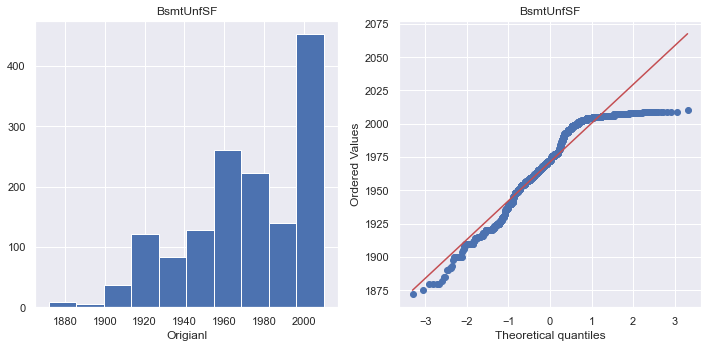

              skew  kurtosis  normality   normality_p  is_normal
original -0.612831 -4.397157  98.332028  4.440905e-22      False


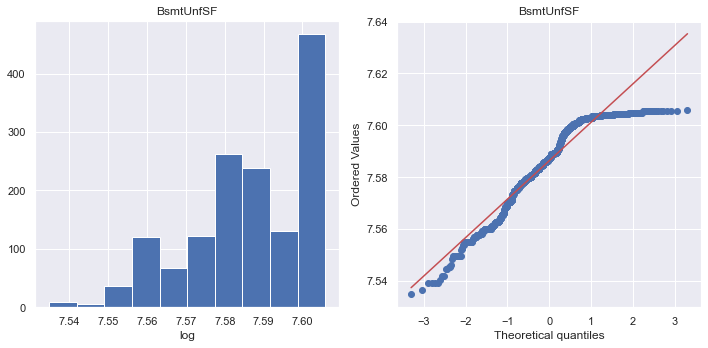

         skew  kurtosis  normality   normality_p  is_normal
log -0.640485 -3.614859  98.314525  4.479939e-22      False


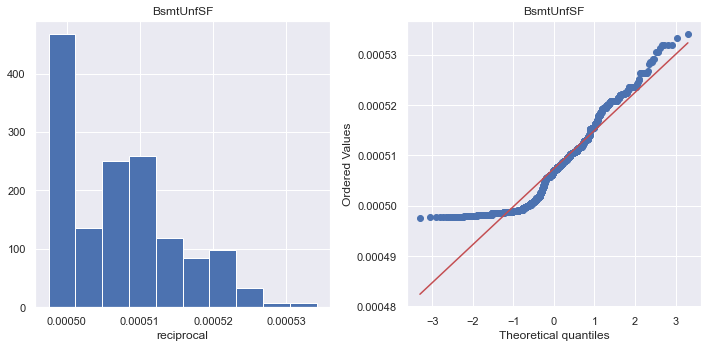

                skew  kurtosis  normality   normality_p  is_normal
reciprocal  0.668665  -2.85837  99.921714  2.005744e-22      False


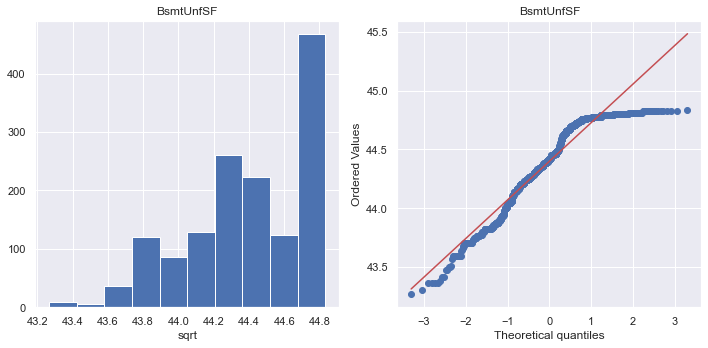

          skew  kurtosis  normality   normality_p  is_normal
sqrt -0.626593 -4.002682   98.11185  4.957725e-22      False


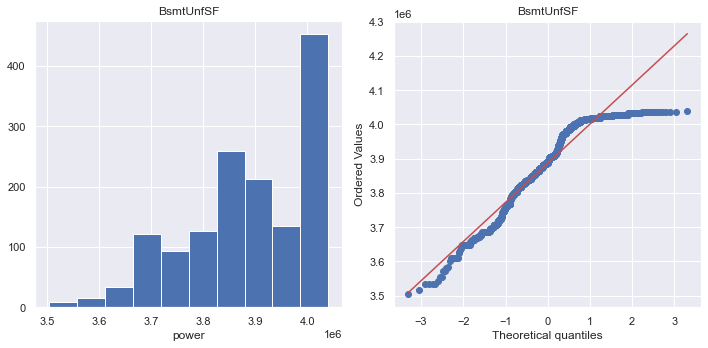

           skew  kurtosis   normality   normality_p  is_normal
power -0.585692 -5.206916  100.113489  1.822351e-22      False


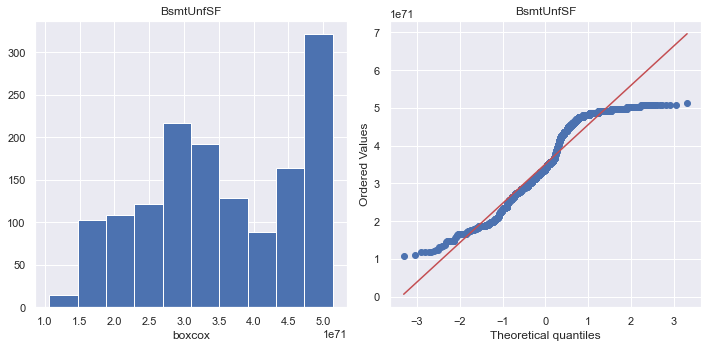

            skew   kurtosis    normality    normality_p  is_normal
boxcox -0.134783 -32.871326  1084.950166  2.547210e-236      False


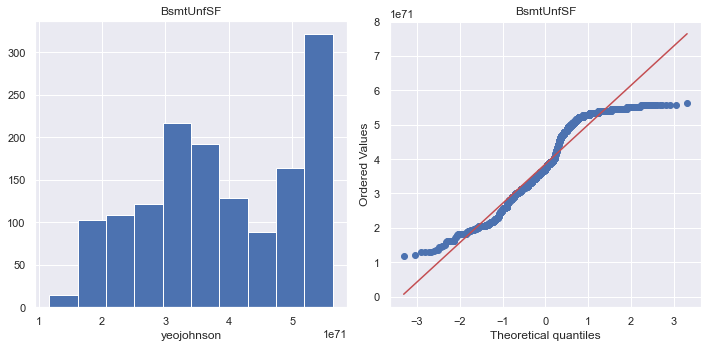

                skew   kurtosis    normality    normality_p  is_normal
yeojohnson -0.134781 -32.871493  1084.960998  2.533453e-236      False


In [17]:
normality_df_yearbuilt = test_transformation(df_train['YearBuilt'], 'BsmtUnfSF')

In [18]:
normality_df_yearbuilt

,skew,kurtosis,normality,normality_p,is_normal
original,-0.612831,-4.397157,98.332028,4.440905e-22,False
log,-0.640485,-3.614859,98.314525,4.479939e-22,False
reciprocal,0.668665,-2.858370,99.921714,2.005744e-22,False
sqrt,-0.626593,-4.002682,98.111850,4.957725e-22,False
power,-0.585692,-5.206916,100.113489,1.822351e-22,False
boxcox,-0.134783,-32.871326,1084.950166,2.547210e-236,False
yeojohnson,-0.134781,-32.871493,1084.960998,2.533453e-236,False


# Summary 

In [19]:
# right skew 
original_skew = np.abs(normality_df_grlivarea.loc['original', 'skew'])
normality_df_grlivarea[normality_df_grlivarea['skew'].abs() <= original_skew]

,skew,kurtosis,normality,normality_p,is_normal
original,1.365156,12.825977,437.120257,1.203767e-95,False
log,-0.006988,2.017774,4.083414,1.298069e-01,True
sqrt,0.593644,6.233928,113.605305,2.142503e-25,False
boxcox,0.000195,2.022495,4.090497,1.293480e-01,True
yeojohnson,0.000171,2.018289,4.073496,1.304523e-01,True


In [20]:
# right skew 
original_skew = np.abs(normality_df_bsmtunfsf.loc['original', 'skew'])
normality_df_bsmtunfsf[normality_df_bsmtunfsf['skew'].abs() <= original_skew]

,skew,kurtosis,normality,normality_p,is_normal
original,0.969592,3.385133,165.239527,1.314294e-36,False
log,-0.765891,3.515835,118.264266,2.085648e-26,False
sqrt,0.219466,-5.235449,38.053473,5.454983e-09,False
boxcox,-0.051563,-5.262049,28.289627,7.194252e-07,False
yeojohnson,-0.051331,-5.309661,28.787586,5.608608e-07,False


In [21]:
# left skew 
original_skew = np.abs(normality_df_yearbuilt.loc['original', 'skew'])
normality_df_yearbuilt[normality_df_yearbuilt['skew'].abs() <= original_skew]

,skew,kurtosis,normality,normality_p,is_normal
original,-0.612831,-4.397157,98.332028,4.440905e-22,False
power,-0.585692,-5.206916,100.113489,1.822351e-22,False
boxcox,-0.134783,-32.871326,1084.950166,2.547210e-236,False
yeojohnson,-0.134781,-32.871493,1084.960998,2.533453e-236,False


Among tested methods, `log` and `sqrt` improved the skeness of the right skewed data, and `power` improve that of the left skewed data. `boxcox` and `yeojohnson` always improved skewness no matter if data is right skewed or left skewed. 